In [31]:
from datetime import date
from nsepy import get_history
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
sbin = get_history(symbol = "SBIN", start = date(2016, 1, 1), end = date(2019, 1, 1))


In [33]:
print(sbin.index)

Index([2016-01-01, 2016-01-04, 2016-01-05, 2016-01-06, 2016-01-07, 2016-01-08,
       2016-01-11, 2016-01-12, 2016-01-13, 2016-01-14,
       ...
       2018-12-18, 2018-12-19, 2018-12-20, 2018-12-21, 2018-12-24, 2018-12-26,
       2018-12-27, 2018-12-28, 2018-12-31, 2019-01-01],
      dtype='object', name='Date', length=742)


In [39]:
ema10 = list(sbin['Close'].ewm(span = 20).mean())


In [40]:
ema20 = list(sbin['Close'].ewm(span = 50).mean())


In [36]:
xaxis = []
for i in range(1, 201):
    xaxis.append(i)

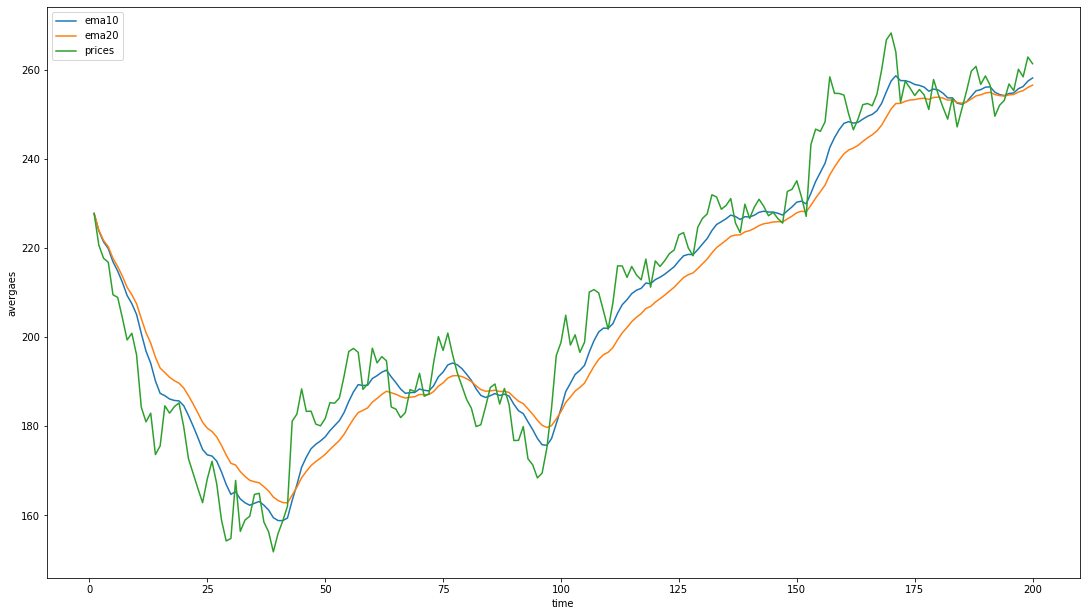

In [37]:
plt.plot(xaxis, ema10[0:200], label = "ema10")
plt.plot(xaxis, ema20[0:200], label = "ema20")
plt.plot(xaxis, list(sbin['Close'])[0:200], label = "prices")
plt.xlabel("time")
plt.ylabel("avergaes")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [41]:
money = 10000
stocks = 0
for i in range(20, 742):
    if(ema10[i-1] <= ema20[i-1] and ema10[i] > ema20[i]):
        #print(sbin.index[i], sbin['Close'][i], "Yes, buy it")
        if(stocks < 0):
            money += stocks*sbin['Close'][i]
            stocks = 0
            print(money)
        stocks = money / sbin['Close'][i]
        money = 0
        print(stocks, money, sbin['Close'][i])
    if(ema10[i-1] >= ema20[i-1] and ema10[i] < ema20[i]):
        #print(sbin.index[i], sbin['Close'][i], "Sell it")
        if(stocks == 0):
            stocks = -(money/sbin['Close'][i])
            money = 2 * money
        else:            
            money = stocks * sbin['Close'][i]
            stocks = 0
        print(stocks, money, sbin['Close'][i])

        

53.96654074473826 0 185.3
0 9711.27900701565 179.95
47.38364970488241 0 204.95
0 11571.087257932284 244.2
43.42686154224914 0 266.45
0 12003.184530277662 276.4
40.92459778478575 0 293.3
0 11239.940781591406 274.65
36.135479124228915 0 311.05
0 10921.94856529819 302.25
33.1068462118769 0 329.9
0 9867.49551344991 298.05
36.93616138293061 0 267.15
0 9520.295596450364 257.75
35.02039947195278 0 271.85
0 9257.642600410718 264.35
33.306863106352644 0 277.95
